In this project, we aim to build a simple linear regression model to analyze how different factors such as engine size and the number of cylinders impact CO2 emissions in vehicles. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Collection
First, we need to obtain a dataset that contains information about vehicle fuel consumption, engine size, number of cylinders, and CO2 emissions.

In [2]:
df = pd.read_csv(r'C:\Users\singh\Downloads\FuelConsumptionCo2.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Data Preprocessing
#### Loading Data
Load the dataset into a pandas DataFrame.
#### Exploratory Data Analysis (EDA)
Examine the dataset for any missing values, outliers, or inconsistencies. Understand the distribution of various features.

In [5]:
cdf = df[[ "CYLINDERS", "ENGINESIZE", "FUELCONSUMPTION_COMB","CO2EMISSIONS" ]]
cdf.head()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4,2.0,8.5,196
1,4,2.4,9.6,221
2,4,1.5,5.9,136
3,6,3.5,11.1,255
4,6,3.5,10.6,244


array([[<Axes: title={'center': 'CYLINDERS'}>,
        <Axes: title={'center': 'ENGINESIZE'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

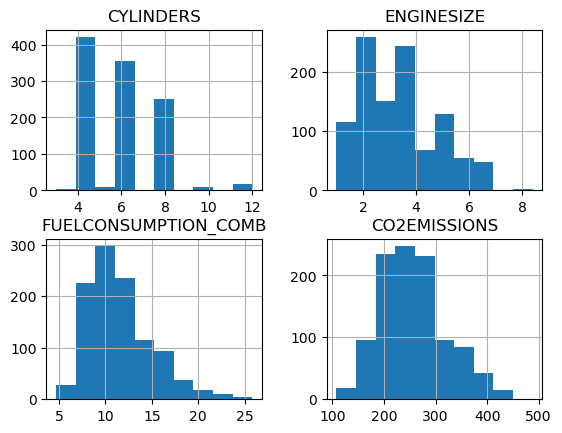

In [6]:
cdf.hist()

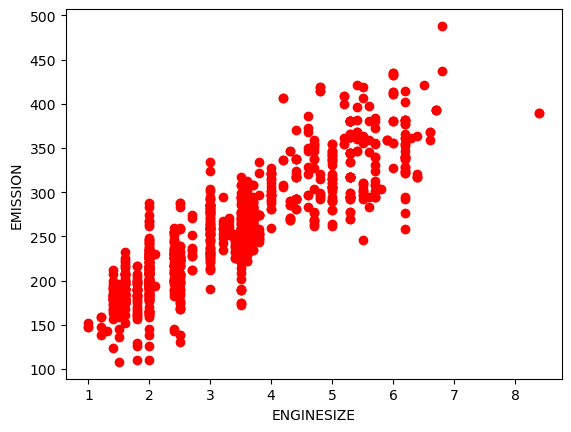

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "red")
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSION")
plt.show()

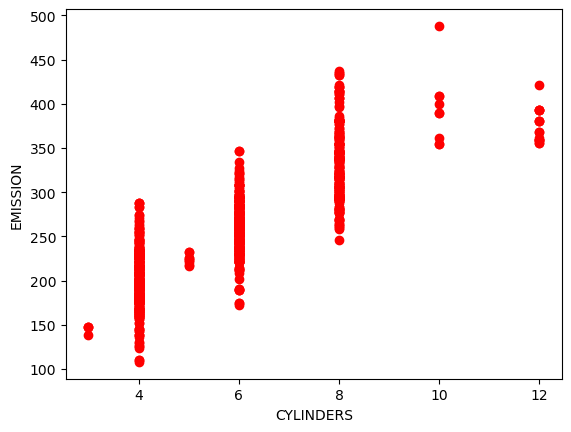

In [8]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = "red")
plt.xlabel("CYLINDERS")
plt.ylabel("EMISSION")
plt.show()

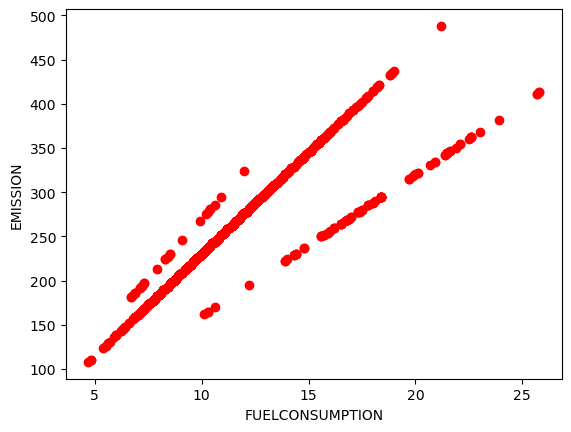

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = "red")
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("EMISSION")
plt.show()

## Splitting the Data
Split the data into training and testing sets. A common split is 80% for training and 20% for testing.

In [10]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

In [11]:
len(msk)

1067

In [12]:
train.shape

(815, 4)

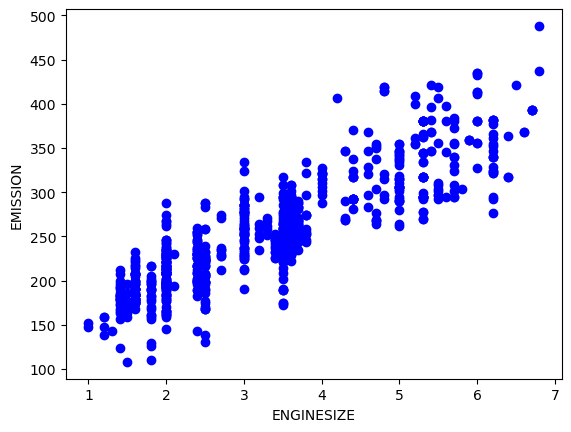

In [13]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color = "blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSION")
plt.show()

### Building the Model
Choose a simple linear regression model.
### Training the Model 
Fit the model on the training data using the selected features.

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)
print("Coefficient:", regr.coef_)
print("Intercept:", regr.intercept_)


Coefficient: [[39.35194899]]
Intercept: [125.13895491]


Text(0, 0.5, 'CO2EMISSIONS')

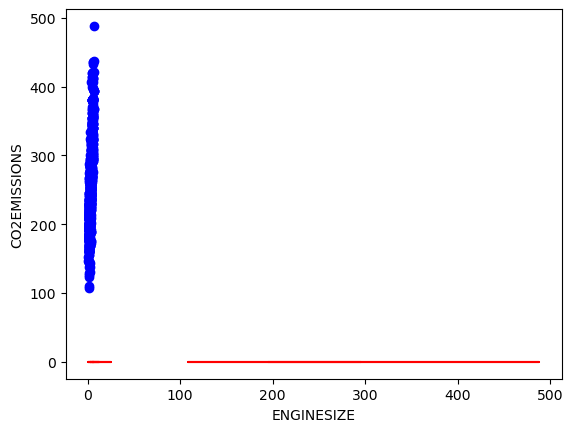

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")


### Model Evaluation
#### Performance Metrics 
Evaluate the model's performance on the testing set using metrics such as Mean Squared Error (MSE) and R-squared (R²).

In [18]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_pred = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_pred) )

Mean absolute error: 24.25
Residual sum of squares (MSE): 1010.84
R2-score: 0.76
